In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [4]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.shape

(1460, 81)

In [7]:
test_data.shape

(1459, 80)

## 查看缺失值

In [8]:
def MissingValue(df):
    miss_value = df.isnull().sum() #缺失数量
    miss_percentage = miss_value / df.shape[0] #缺失占比
    miss_df = pd.concat([miss_value, miss_percentage], axis=1)
    miss_df = miss_df.rename(columns={0:'MissingValue',1:'%MissingPercent'})
    miss_df = miss_df.loc[miss_df['MissingValue']!=0, :]
    miss_df = miss_df.sort_values(by='%MissingPercent', ascending = False) #降序排列
    return miss_df

In [9]:
MissingValue(train_data)

,MissingValue,%MissingPercent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [10]:
MissingValue(test_data)

,MissingValue,%MissingPercent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461


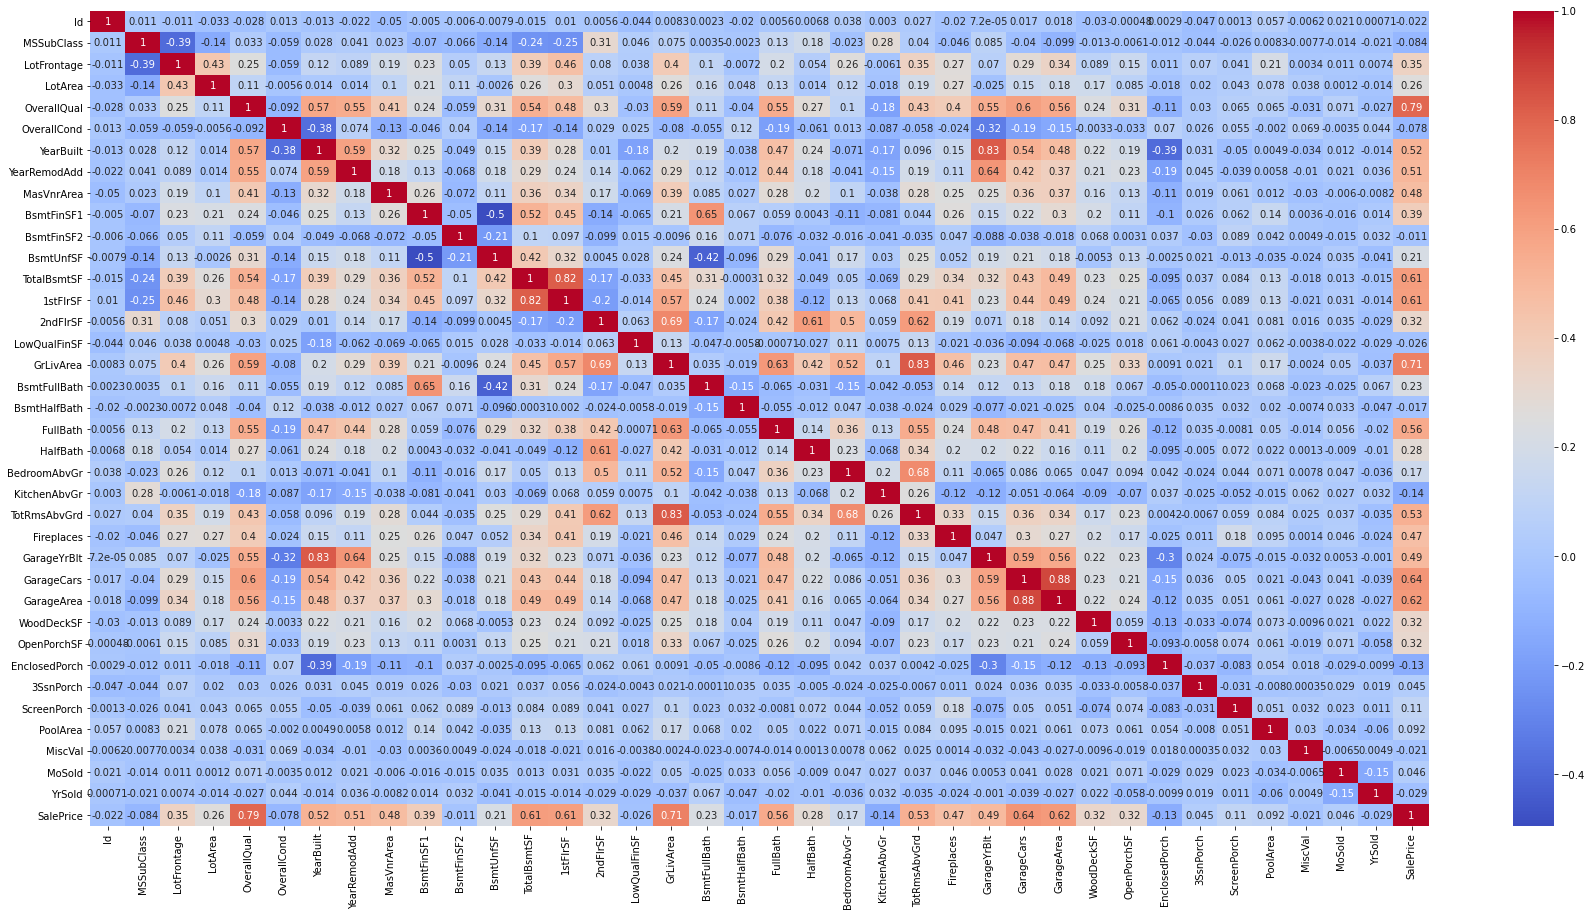

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot = True)
plt.show()

## 删除掉缺失值过大的特征

In [12]:
train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)


In [13]:
train_data.shape

(1460, 76)

In [14]:
test_data.shape

(1459, 75)

## 将object类型数据进行特征编码

In [15]:
categorical_feature_mask = train_data.dtypes==object
categorical_cols = train_data.columns[categorical_feature_mask].tolist()
 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()       #实例化
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [16]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [17]:
categorical_feature_mask_test = test_data.dtypes==object
categorical_cols_test = test_data.columns[categorical_feature_mask_test].tolist()
test_data[categorical_cols_test] = test_data[categorical_cols_test].apply(lambda col:labelencoder.fit_transform(col.astype(str)))


In [18]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [19]:
MissingValue(train_data)

,MissingValue,%MissingPercent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479


In [20]:
MissingValue(test_data)

,MissingValue,%MissingPercent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFinSF1,1,0.000685
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685


## 对空缺值用平均值来进行填充

In [21]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())

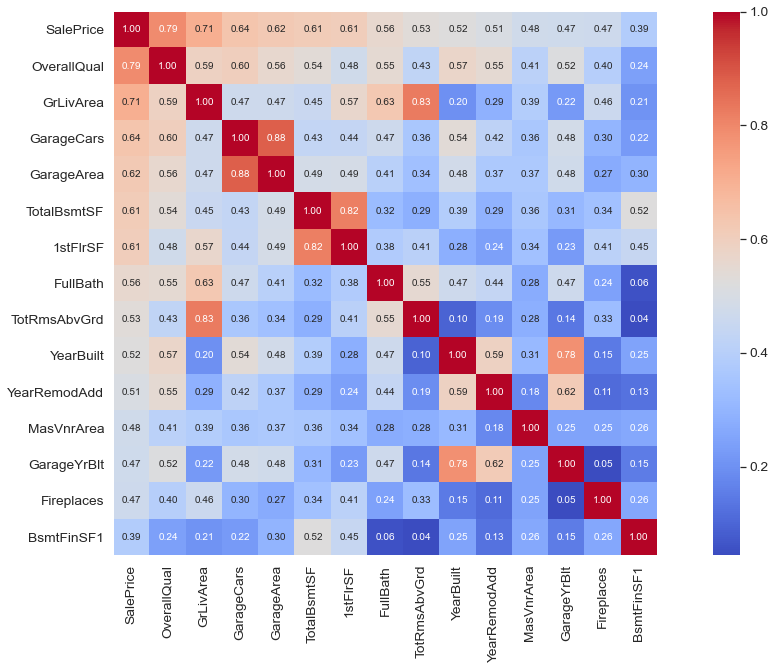

In [40]:
#销售价格的相关系数矩阵
k = 15 
plt.figure(figsize=(20,10))
corrmat = train_data.corr()
# 选择与之最相关的15个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 通过相关系数矩阵，为模型的创建挑选影响房价的关键特征

In [41]:
train_data = train_data[cols]
train_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


In [42]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

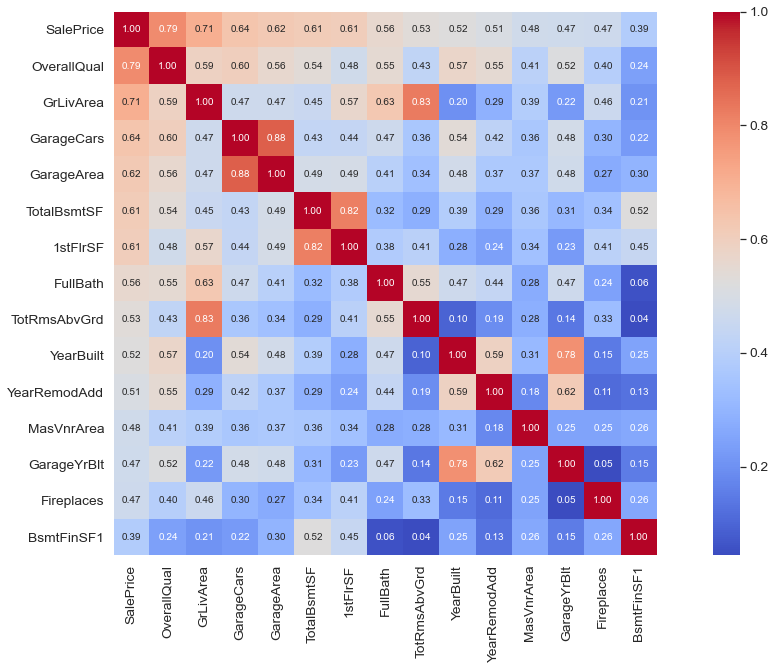

In [43]:
#销售价格的相关系数矩阵
k = 15 
plt.figure(figsize=(20,10))
corrmat = train_data.corr()
# 选择与之最相关的15个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
train_data[cols].values.shape

(1460, 15)

## 生成测试数据集

In [45]:
test_data = test_data[cols.drop('SalePrice')]
test_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.000000,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.000000,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.000000,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.000000,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.000000,0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,0.0,1977.721217,0,0.0
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,0.0,1970.000000,0,252.0
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,0.0,1960.000000,1,1224.0
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,0.0,1977.721217,0,337.0


In [46]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())

## 划分数据并进行标准化

In [47]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
 
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'], test_size=0.3, random_state=101)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
 
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [48]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

## 线性模型

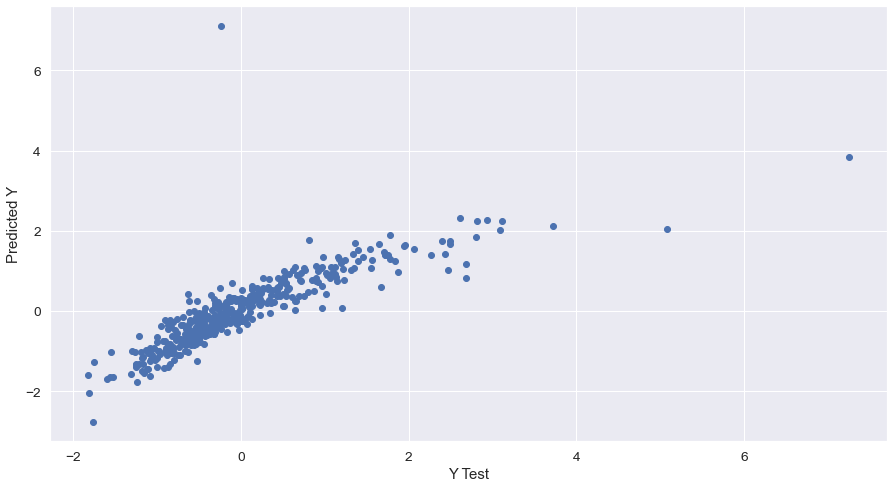

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# 预测数据
predictions = lm.predict(X_test)
predictions = predictions.reshape(-1,1)
 
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [50]:
from sklearn import metrics
print('平均绝对误差:', metrics.mean_absolute_error(y_test, predictions))
print('均方误差:', metrics.mean_squared_error(y_test, predictions))
 

平均绝对误差: 0.29105407971784325
均方误差: 0.2999575602451757
均方根误差: 0.5476838141164806


## 决策树回归模型

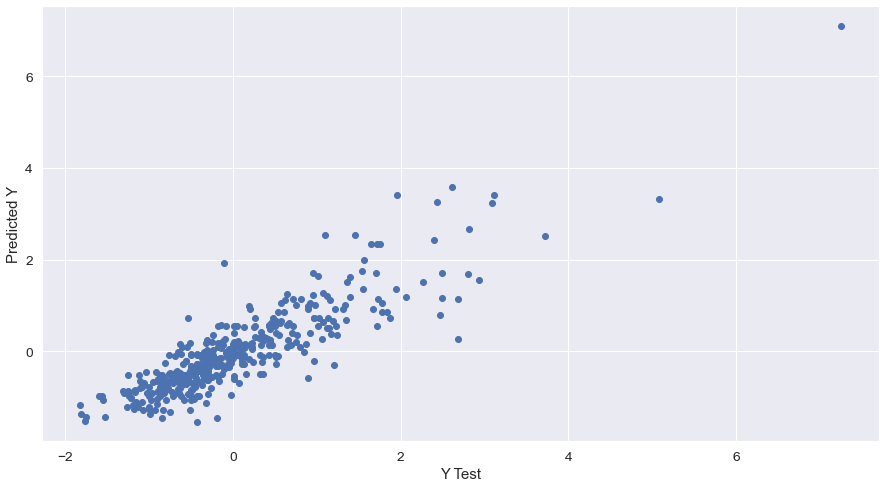

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
 
# 预测数据
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)
 
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [53]:
print('平均绝对误差:', metrics.mean_absolute_error(y_test, dtr_pred))
print('均方误差:', metrics.mean_squared_error(y_test, dtr_pred))


平均绝对误差: 0.32680710218014325
均方误差: 0.22167709660119192
均方根误差: 0.4708259727342916


/Users/guyaning/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


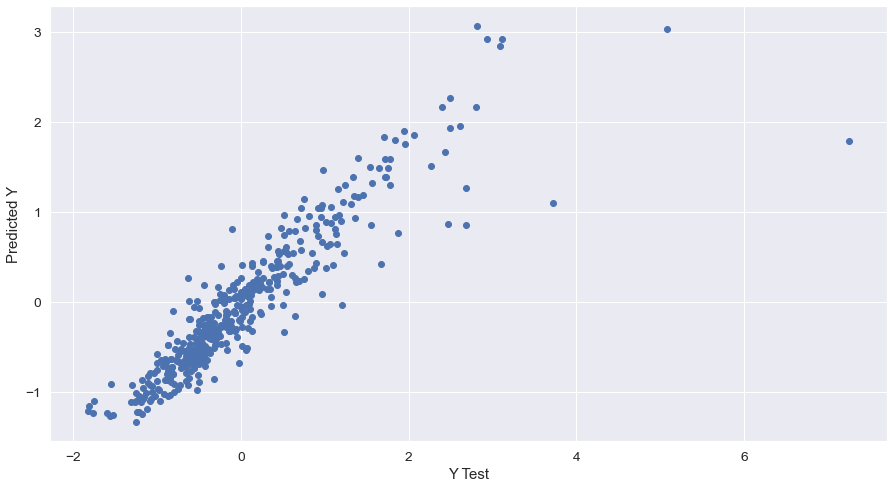

In [54]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
 
# 预测数据
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)
 
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [55]:

print('平均绝对误差:', metrics.mean_absolute_error(y_test, svr_pred))
print('均方误差:', metrics.mean_squared_error(y_test, svr_pred))

平均绝对误差: 0.23401679589999028
均方误差: 0.1899647870349416
